ENVIRONMENT PREPARATION

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print('DONE!')

DONE!


FUNGSI UNTUK MENAMPILKAN TABEL HASIL FUNGSI GROUP BY DI DATAFRAME ATAU TABEL SEJENIS

In [0]:
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.set_xticklabels(df.index)
    return bars

#TENTANG DATASET YANG AKAN DIOLAH

Dataset yang akan kita olah disini adalah data video games berformat CSV yang berasal dari website: https://corgis-edu.github.io/corgis/csv/video_games/. Data ini berisi tentang data-data tertentu dari konsol game Nintendo DS, Sony PSP, X360, Nintendo Wii, dan PlayStasion 3, seperti judul game, nilai dari game, data penjualan dari tiap-tiap game, dsb.

Untuk lebih lengkapnya mengenai data apa saja yang ada pada Dataset, berikut ini adalah keterangan dari masing-masing kolom data yang akan diolah. Tabel berikut diunggah pada laman yang sama dengan laman tempat data ini didownload.

In [0]:
url = "https://corgis-edu.github.io/corgis/csv/video_games/"
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[-1]
pd.set_option('display.max_colwidth', 0)
df_list[0]

,Key,List of...,Comment,Example Value
0,Title,String,The full title of this game.,"""Super Mario 64 DS"""
1,Features.Handheld?,Boolean,Whether this is a hand-held game.,True
2,Features.Max Players,Integer,The maximum number of players that can play this game.,1
3,Features.Multiplatform?,Boolean,Whether this game is available on multiple platforms.,True
4,Features.Online?,Boolean,Whether this game supports online play.,True
5,Metadata.Genres,String,The list of genres that this game belongs to.,"""Action"""
6,Metadata.Licensed?,Boolean,Whether this game was based off a previously licensed entity.,True
7,Metadata.Publishers,String,The list of publishers who created this game,"""Nintendo"""
8,Metadata.Sequel?,Boolean,Whether this game is a sequel to another game.,True
9,Metrics.Review Score,Integer,"a typical review score for this game, out of 100.",85


Mari kita muat dataset tadi dan menampilkan 5 data awalnya.

In [8]:
train_data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Video Game's Data/video_games.csv")
train_data.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,Metrics.Sales,Metrics.Used Price,Release.Console,Release.Rating,Release.Re-release?,Release.Year,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Polled,Length.All PlayStyles.Rushed,Length.Completionists.Average,Length.Completionists.Leisure,Length.Completionists.Median,Length.Completionists.Polled,Length.Completionists.Rushed,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,True,2004,22.716667,31.900000,24.483333,57,14.300000,29.766667,35.033333,30.000000,20,22.016667,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,True,2004,10.100000,11.016667,10.000000,5,9.516667,0.000000,0.000000,0.000000,0,0.000000,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,True,2004,4.566667,11.566667,2.500000,57,2.266667,10.000000,14.100000,7.250000,16,6.800000,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,True,2004,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,True,2004,13.250000,48.383333,10.000000,37,7.066667,72.566667,78.866667,72.566667,2,66.283333,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


Berikut ini adalah tipe data dari masing-masing kolom.

In [0]:
train_data.dtypes

Title                             object
Features.Handheld?                  bool
Features.Max Players               int64
Features.Multiplatform?             bool
Features.Online?                    bool
Metadata.Genres                   object
Metadata.Licensed?                  bool
Metadata.Publishers               object
Metadata.Sequel?                    bool
Metrics.Review Score               int64
Metrics.Sales                    float64
Metrics.Used Price               float64
Release.Console                   object
Release.Rating                    object
Release.Re-release?                 bool
Release.Year                       int64
Length.All PlayStyles.Average    float64
Length.All PlayStyles.Leisure    float64
Length.All PlayStyles.Median     float64
Length.All PlayStyles.Polled       int64
Length.All PlayStyles.Rushed     float64
Length.Completionists.Average    float64
Length.Completionists.Leisure    float64
Length.Completionists.Median     float64
Length.Completio

Mari kita lihat statistika deskriptif dari data dengan menggunakan fungsi describe() dari DataFrame.


In [0]:
train_data.describe(include='all')

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,Metrics.Sales,Metrics.Used Price,Release.Console,Release.Rating,Release.Re-release?,Release.Year,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Polled,Length.All PlayStyles.Rushed,Length.Completionists.Average,Length.Completionists.Leisure,Length.Completionists.Median,Length.Completionists.Polled,Length.Completionists.Rushed,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
count,1212,1212,1212.000000,1212,1212,1212,1212,948,1212,1212.000000,1212.00000,1212.000000,1212,1212,1212,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
unique,908,1,NaN,1,1,48,1,31,1,NaN,NaN,NaN,5,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MX vs. ATV Untamed,True,NaN,True,True,Action,True,EA,True,NaN,NaN,NaN,Nintendo DS,E,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,1212,NaN,1212,1212,476,1212,165,1212,NaN,NaN,NaN,317,491,1212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.658416,NaN,NaN,NaN,NaN,NaN,NaN,68.828383,0.50316,17.393894,NaN,NaN,NaN,2006.820132,13.653177,26.250426,11.225371,44.415842,9.396163,19.808223,25.775234,18.801279,5.657591,16.401059,12.731491,18.866048,12.103548,13.995875,10.319788,8.465952,11.051966,8.280941,24.882838,6.974697
std,NaN,NaN,1.204377,NaN,NaN,NaN,NaN,NaN,NaN,12.956266,1.06985,5.018972,NaN,NaN,NaN,1.050653,19.397156,51.598941,13.493717,154.837893,11.176371,46.634546,61.507543,44.040068,19.702471,40.331419,23.979610,42.917021,23.355374,57.333257,20.895117,9.691745,14.092617,9.502600,87.382770,7.964522
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,0.01000,4.950000,NaN,NaN,NaN,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,0.09000,14.950000,NaN,NaN,NaN,2006.000000,3.562500,4.000000,3.025000,1.000000,2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,0.21000,17.950000,NaN,NaN,NaN,2007.000000,8.858333,12.000000,8.000000,6.000000,6.708333,6.000000,6.166667,6.000000,1.000000,5.500000,7.291667,8.000000,7.000000,1.000000,6.283333,6.575000,8.000000,6.041667,3.000000,5.341667
75%,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,79.000000,0.46000,17.950000,NaN,NaN,NaN,2008.000000,16.033333,27.600000,13.783333,25.000000,11.366667,21.554167,27.116667,20.350000,3.000000,18.379167,16.112500,21.033333,15.000000,7.000000,12.941667,11.033333,14.508333,10.533333,14.000000,9.312500


Dari tabel diatas, dapat dilihat bahwa pada kolom Metadata.Publishers hanya terdapat 948 baris data yang terisi dari total 1212 baris yang ada. visualisasi data yang hilang dapat kita lihat lewat heatmap berikut

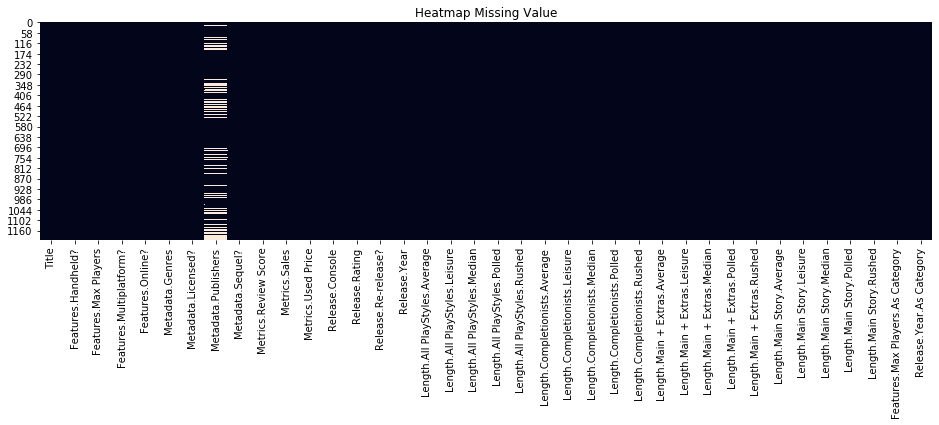

In [0]:
plt.figure(figsize=(16,4))
sns.heatmap(train_data.isnull(),cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

Bisa dilihat ada banyak data yanng kosong pada kolom Metadata.Publishers, namun karena kita tidak akan langsung menggunakan kolom tersebut, maka data tersebut akan dibiarkan kosong untuk sementara waktu

Kembali pada tabel describe di atas, ada beberapa kolom bertipe data integer namun rentangnya tak begitu panjang, misalnya kolom *Features.Max Players* yang hanya memiliki rentang dari 1-8. Ada juga tahun rilis game yang hanya memiliki rentang tahun 2004-2008. Begitu juga pada variabel bernilai objek yang elemen uniknya tak begitu banyak. 

Data-data tadi dapat kita perlakukan sebagai data kategorik. namun, untuk data numerik yang bisa dijadikan data kategorik, hanya dibuatkan kolom baru dimana isinya adalah data yang sama dengan tipe data yang berbeda

berikut ini adalah kode untuk membuat kolom baru yang berasal dari data integer dengan rentang kecil yang akan dibuat menjadi bertipe kategorik

In [0]:
train_data['Features.Max Players.As Category'] = train_data['Features.Max Players'].astype('category')
train_data['Release.Year.As Category'] = train_data['Release.Year'].astype('category')

#HIPOTESIS 1

Berikut ini kita akan menampilkan jumlah game yang dirilis per tahunnya.

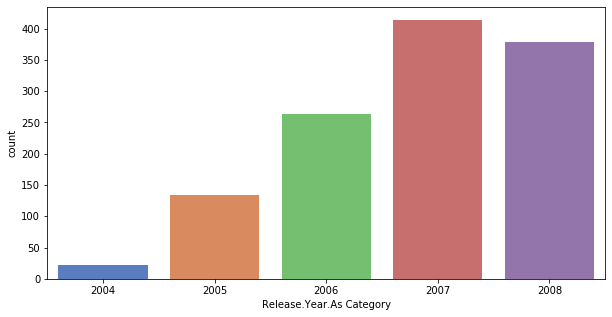

In [236]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'Release.Year.As Category', palette = 'muted', data=train_data)

jika dilihat dari data yang kita miliki, tren pembuatan video game meningkat sampai tahun 2007, dan menurun setelahnya. Hipotesis yang muncul :
1. Bisa jadi, ada penurunan keuntungan dari game-game yang dibuat pada tahun 2007, sehingga di tahun 2008 para developer tak begitu bersemangat untuk meluncurkan game baru; atau
2. Ada penurunan penilaian pada game-game di tahun 2007 sehingga para pengembang video game mulai mengutamakan kualitas dibanding kuantitas sehingga video game yang diproduksi lebih sedikit namun penilaian untuk game yang terilis menjadi lebih baik

,total_game,mean_score,mean_income
2004,22,69.772727,0.439091
2005,134,70.164179,0.564851
2006,263,69.076046,0.504829
2007,414,67.519324,0.482681
2008,379,69.559367,0.506280


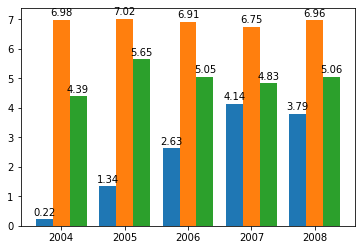

In [50]:
year_list = list(train_data['Release.Year.As Category'].unique())
total_game_each_year = dict(zip(year_list,[train_data\
                       [train_data['Release.Year.As Category'] == year].shape[0]/100\
                       for year in year_list]))

mean_score_each_year = dict(zip(year_list, [train_data\
                       [train_data['Release.Year.As Category'] == year]\
                       ['Metrics.Review Score'].mean()/10 for year in year_list]))

mean_income_each_year = dict(zip(year_list, [train_data\
                        [train_data['Release.Year.As Category'] == year]\
                        ['Metrics.Sales'].mean()*10 for year in year_list]))

col_list = ['total_game', 'mean_score', 'mean_income']
tabel_perbandingan_rerata = pd.DataFrame(dict(zip(col_list, [total_game_each_year, mean_score_each_year, mean_income_each_year]))).round(2)
grafik_perbandingan_rerata = groupedbarplot(tabel_perbandingan_rerata)

NOTE:
    
    warna biru (kiri) : jumlah game (dalam ratus buah)
       
    warna jingga (tengah) : rerata nilai keseluruhan game per tahun (dalam satuan puluhan)
       
    warna hijau (kanan) : rerata penghasilan keseluruhan game per tahun (dala ratus ribu dolar)

dari sini, terlihat bahwa sebenarnya, penurunan kualitas game terjadi sejak tahun 2006 sampai tahun 2007, dimana produksi game yang meningkat berbanding terbalik dengan skor rata-rata dari game yang menurun, dan skor rata-rata per tahun berbanding lurus dengan rata-rata penghasilan per tahunnya

ini menandakan bahwa bahwa dalam pembuatan game, perlu diperhatikan seberapa baik kualitas game yang dibuat agar pendapatan menjadi lebih maksimal

#HIPOTESIS 2

mari kita lihat jumlah produksi game per konsol dari tahun ke tahun

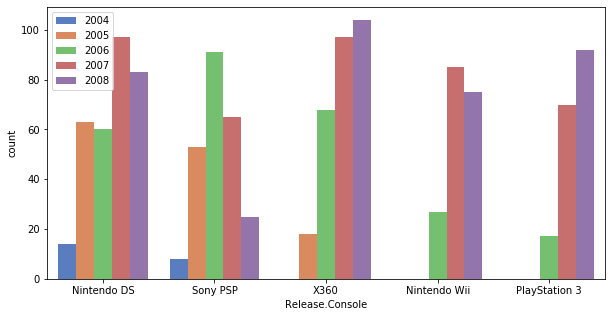

In [37]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'Release.Console', hue = 'Release.Year.As Category', palette = 'muted', data=train_data)
legend_position = plt.legend(loc = 'best')

Dari sini, kita lihat bahwa selain konsol X360 dan PlayStation 3, produksi game yang ada cenderung mengalami penurunan di tahun 2007, terutama Sony PSP yang trennya turun lebih awal yaitu sejak tahun 2006

Mari kita lihat bagaimana hubungannya dengan penjualan dan penilaian dari masing-masing konsol. Pertama-tama, kita buat dulu tabel dari jumlah rilis game dari masing-masing konsol per tahunnya.

In [38]:
console_release_per_year = train_data.groupby(['Release.Console','Release.Year.As Category'], sort = False).size().unstack()
console_release_per_year

Release.Year.As Category,2004,2005,2006,2007,2008
Release.Console,,,,,
Nintendo DS,14.0,63.0,60.0,97.0,83.0
Sony PSP,8.0,53.0,91.0,65.0,25.0
X360,NaN,18.0,68.0,97.0,104.0
Nintendo Wii,NaN,NaN,27.0,85.0,75.0
PlayStation 3,NaN,NaN,17.0,70.0,92.0


berikut ini adalah tabel yang berisikan total pendapatan dari masing-masing konsol tiap tahunnya, data angka dalam juta dolar

In [79]:
year_list = list(train_data['Release.Year.As Category'].unique())
console_list = list(train_data['Release.Console'].unique())
mean_year_income_each_console = dict(zip(year_list, [dict(zip(console_list,[train_data[\
                          (train_data['Release.Console'] == console) & \
                          (train_data['Release.Year']==year)]\
                          ['Metrics.Sales'].mean() for console in console_list])) for year in year_list]))
sum_sales_each_console = pd.DataFrame(mean_year_income_each_console).round(3)
sum_sales_each_console.index.name = 'Console'
sum_sales_each_console.columns.name = 'year'
sum_sales_each_console

year,2004,2005,2006,2007,2008
Console,,,,,
Nintendo DS,0.528,0.746,0.701,0.408,0.305
Sony PSP,0.284,0.398,0.241,0.184,0.254
X360,NaN,0.423,0.473,0.607,0.660
Nintendo Wii,NaN,NaN,1.055,0.730,0.616
PlayStation 3,NaN,NaN,0.478,0.391,0.494


berikut ini adalah tabel yang berisikan total skor game dari masing-masing konsol tiap tahunnya, data angka dalam juta dolar

In [84]:
year_list = list(train_data['Release.Year.As Category'].unique())
console_list = list(train_data['Release.Console'].unique())
mean_year_score_each_console = dict(zip(year_list, [dict(zip(console_list,[train_data[\
                          (train_data['Release.Console'] == console) & \
                          (train_data['Release.Year']==year)]\
                          ['Metrics.Review Score'].mean()/10 for console in console_list])) for year in year_list]))
sum_score_each_console = pd.DataFrame(mean_year_score_each_console).round(1)
sum_score_each_console.index.name = 'Console'
sum_score_each_console.columns.name = 'year'
sum_score_each_console

year,2004,2005,2006,2007,2008
Console,,,,,
Nintendo DS,6.8,6.8,6.8,6.6,7.0
Sony PSP,7.3,7.1,6.9,6.7,7.0
X360,NaN,7.7,7.1,6.9,7.0
Nintendo Wii,NaN,NaN,6.5,6.4,6.6
PlayStation 3,NaN,NaN,7.4,7.2,7.1


Berikut ini adalah perbandingan masing - masing groupedbarplot dari Jumlah game dari masing-masing konsol yang diproduksi per tahun dan pendapatan rata-rata dari masing-masing game konsol tiap tahunnya

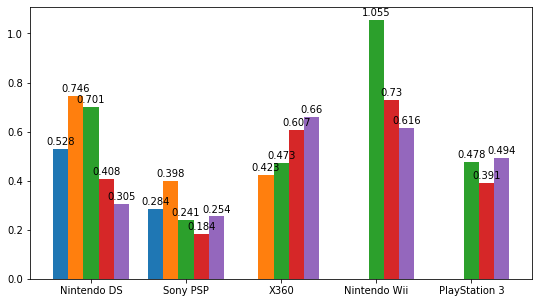

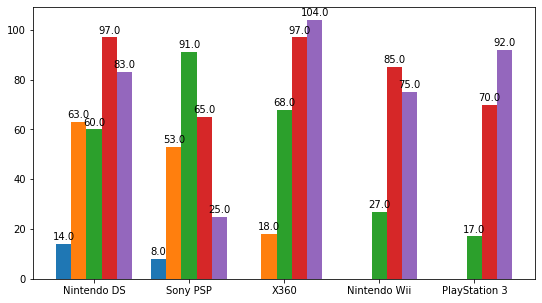

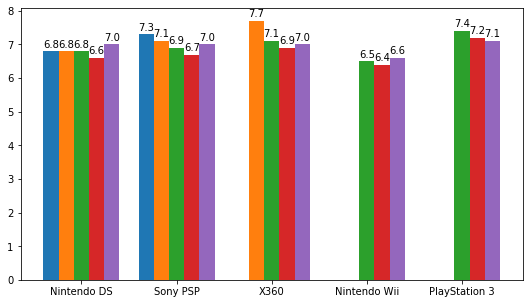

In [85]:
plt.figure(figsize=(9,5))
groupedbarplot(sum_sales_each_console)
plt.show()
plt.figure(figsize=(9,5))
grafik_jumlah_video_game = groupedbarplot(console_release_per_year)
plt.show()
plt.figure(figsize=(9,5))
groupedbarplot(sum_score_each_console)
plt.show()
#sns.countplot(x = 'Release.Console', hue = 'Release.Year.As Category', palette = 'muted', data=train_data)
#plt.legend(loc = 'best')

NOTE: Warna-warna bar menunjukan tahun rilis game, keterangannya adalah sebagai berikut
    
    warna biru(kiri): 2004
    jingga          : 2005
    hijau           : 2006
    merah           : 2007
    ungu(kanan)     : 2008 

Dari sini, masing-masing konsol terlihat memiliki variasi masing-masing dalam penilaian dan pendapatan gamenya

Untuk Nintendo DS dan Nintendo Wii, sekalipun game-game yang dirilis meningkat, penilaian tak berubah terlalu banyak berubah, selalu dibawah 7. Bisa saja karena game yang dirilis terkesan tak begitu menarik, mengakibatkan penjualan mereka selalu menurun tiap tahunnya.

Untuk Sony PSP, meskipun secara penilaian dan penjualan secara umum stabil, dimana naik dan turunnya bersesuaian, penjualan game yang rilis di konsol ini lebih kecil rata-ratanya ketimbang game yang rilis di konsol ini. Bisa jadi inilah yang membuat para developer game mulai malas untuk mengeluarkan game pada konsol ini sehingga sejak tahun 2007 game yang dirilis menurun drastis

Jika diperhatikan(pengecualian pada PlayStation 3), jumlah game yang dirilis bergantung pada seberapa untung game-game yang dirilis di tahun sebelumnya. Jika keuntungan besar atau stabil, maka game yang akan dirilis di tahun berikutnya akan meningkat tajam. Contoh yang dapat dilihat dengan jelas adalah pada kasus Nintendo Wii. Di tahun 2006, pertama kali konsol game ini dipublikasikan, keuntungan yang didapat sangat tinggi dibanding yang lain. Dan akibatnya, di tahun 2007, game yang dirilis meningkat tajam menjadi 87 game dari tahun sebelumnya yang hanya 27.

Untuk kasus X360 dan PlayStation 3, penilaian game mereka terbilang menjadi yang paling tinggi dari yang lain, sehingga penjualan mereka cenderung stabil(untuk PlayStation 3) atau meningkat (untuk X360). Berbanding terbalik dengan Nintendo Wii yang rata-rata penilaian gamenya bernilai paling kecil di antara yang lain, mengakibatkan penjualan kian menurun tiap tahunnya.

Maka terlihat bahwa konsumen dan produsen memiliki peran penting, dimana sebagai penyedia game, agar bisnis game konsol bertahan, developer tak hanya mementingkan sisi keuntungan dari game, atau mungkin keuntungan bukanlah target utama dari bisnis ini, yang penting adalah kualitas dari game yang dirilis, sehingga para konsumen senang dan bertahan pada konsol ini, lalu konsumen baru bermunculan dan akhirnya mengakibatkan penjualan meningkat.